In [4]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [135]:
#lat_slice=slice(-38,-30)
#lon_slice=slice(112,120)
lat_slice=slice(-45.7,-6.9)
lon_slice=slice(108,158.5)
Fc = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/barra_r/Fc_201601010000_201601312300.nc")
F = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/barra_r/F_201601010000_201601312300.nc")
F_dqdt = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/barra_r/F_dqdt_201601010000_201601312300.nc")
F_hourly = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/barra_r/F_hourly_201601010000_201601312300.nc")

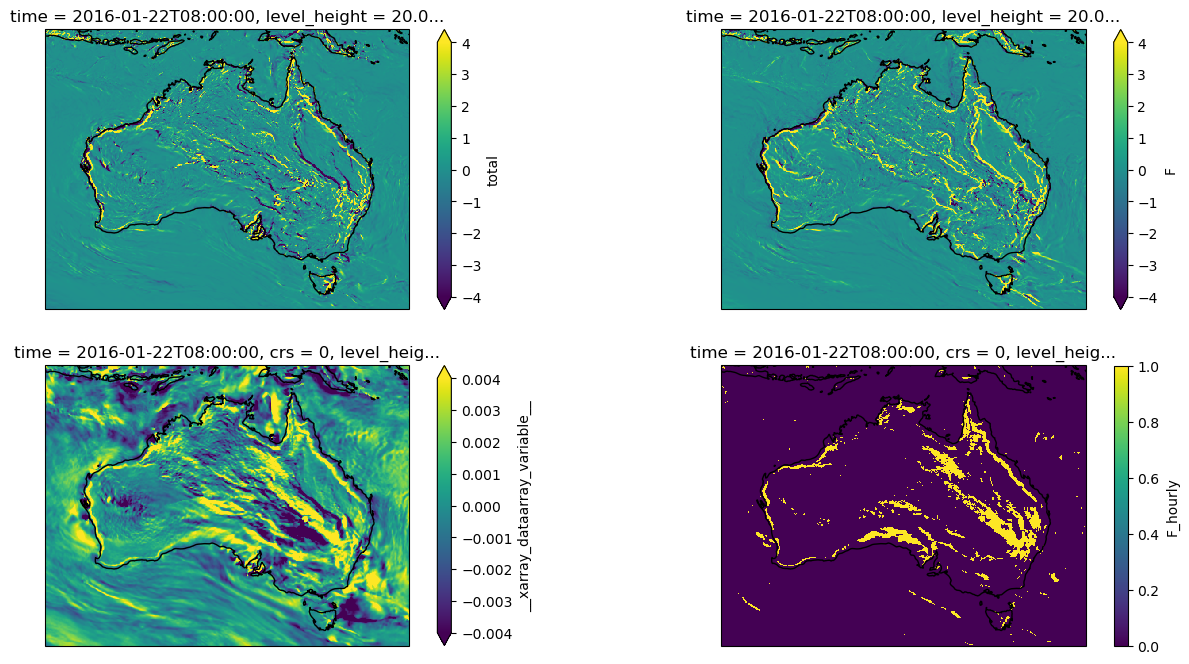

In [172]:
plt.figure(figsize=[16,8])

t = "2016-01-22 08:00"

ax=plt.subplot(2,2,1,projection=ccrs.PlateCarree())
Fc.total.sel(time=t,lat=lat_slice,lon=lon_slice).plot(ax=ax,robust=True,vmin=-4,vmax=4)
ax.coastlines()

ax=plt.subplot(2,2,2,projection=ccrs.PlateCarree())
F.F.sel(time=t,lat=lat_slice,lon=lon_slice).plot(ax=ax,robust=True,vmin=-4,vmax=4)
ax.coastlines()

ax=plt.subplot(2,2,3,projection=ccrs.PlateCarree())
F_dqdt.__xarray_dataarray_variable__.sel(time=t,lat=lat_slice,lon=lon_slice).plot(ax=ax,robust=True,vmin=-0.004,vmax=0.004)
ax.coastlines()

ax=plt.subplot(2,2,4,projection=ccrs.PlateCarree())
F_hourly.F_hourly.sel(time=t,lat=lat_slice,lon=lon_slice).plot(ax=ax)
ax.coastlines()

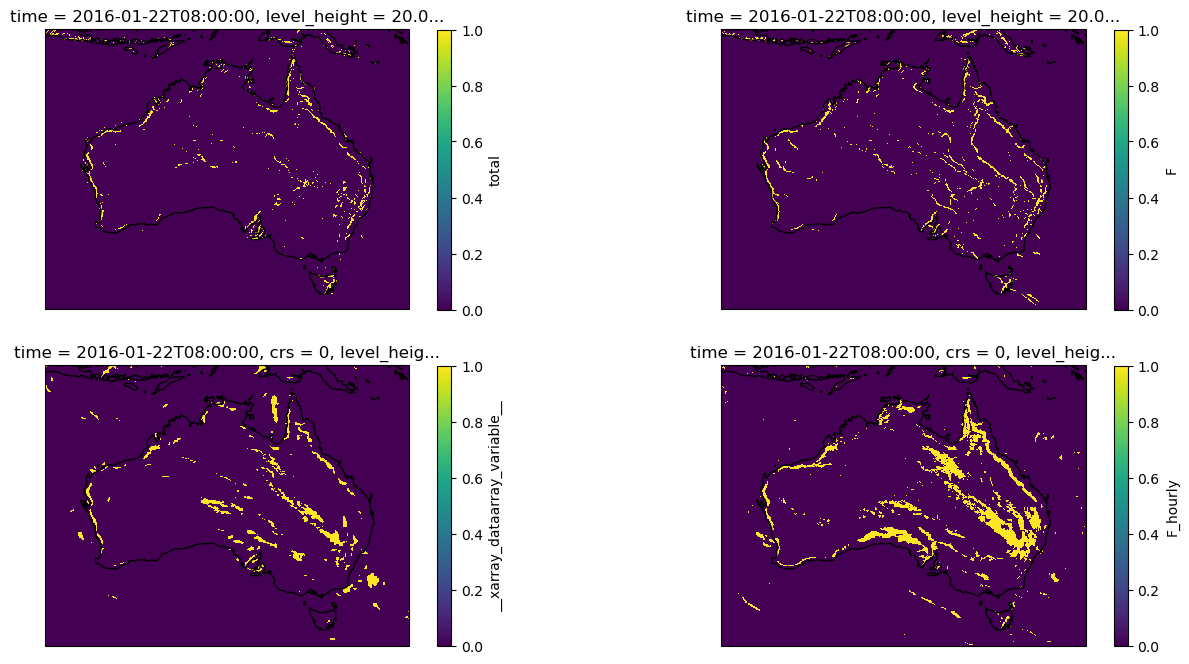

In [173]:
plt.figure(figsize=[16,8])

ax=plt.subplot(2,2,1,projection=ccrs.PlateCarree())
(Fc.total>4).sel(time=t,lat=lat_slice,lon=lon_slice).plot(ax=ax)
ax.coastlines()

ax=plt.subplot(2,2,2,projection=ccrs.PlateCarree())
(F.F>4).sel(time=t,lat=lat_slice,lon=lon_slice).plot(ax=ax)
ax.coastlines()

ax=plt.subplot(2,2,3,projection=ccrs.PlateCarree())
(F_dqdt.__xarray_dataarray_variable__ > 0.00456).sel(time=t,lat=lat_slice,lon=lon_slice).plot(ax=ax)
ax.coastlines()

ax=plt.subplot(2,2,4,projection=ccrs.PlateCarree())
F_hourly.F_hourly.sel(time=t,lat=lat_slice,lon=lon_slice).plot(ax=ax)
ax.coastlines()

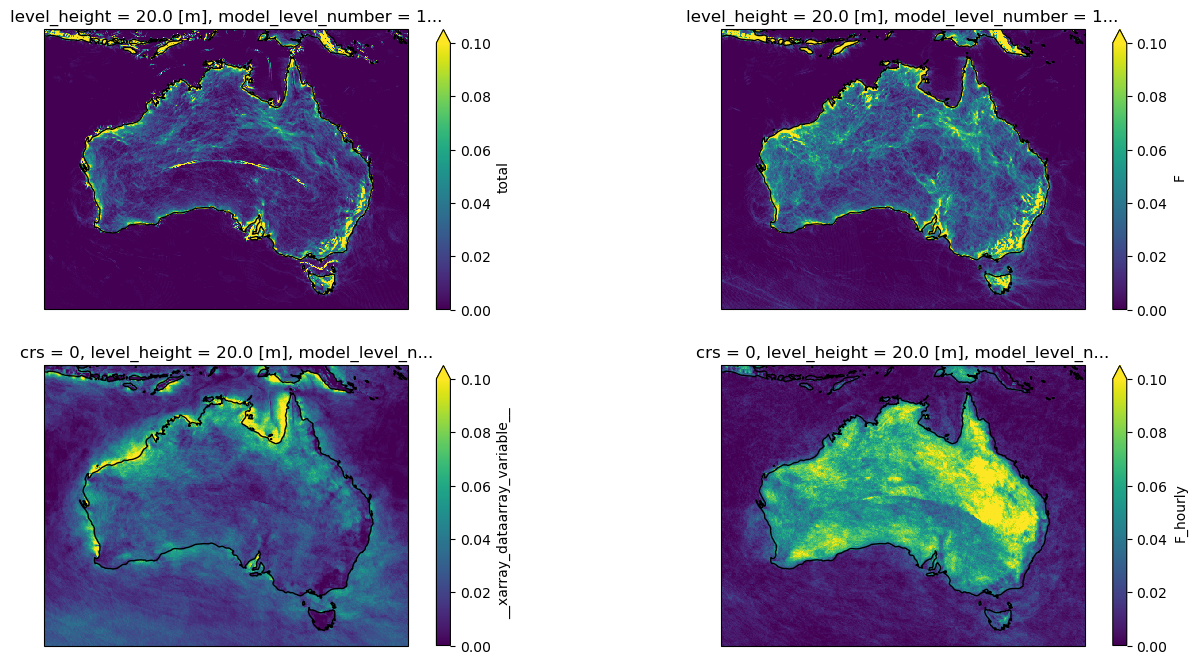

In [174]:
plt.figure(figsize=[16,8])


ax=plt.subplot(2,2,1,projection=ccrs.PlateCarree())
(Fc.total>4).sel(lat=lat_slice,lon=lon_slice).mean("time").plot(ax=ax,vmin=0,vmax=0.1)
ax.coastlines()

ax=plt.subplot(2,2,2,projection=ccrs.PlateCarree())
(F.F>4).sel(lat=lat_slice,lon=lon_slice).mean("time").plot(ax=ax,vmin=0,vmax=0.1)
ax.coastlines()

ax=plt.subplot(2,2,3,projection=ccrs.PlateCarree())
(F_dqdt.__xarray_dataarray_variable__ > 0.00456).sel(lat=lat_slice,lon=lon_slice).mean("time").plot(ax=ax,vmin=0,vmax=0.1)
ax.coastlines()

ax=plt.subplot(2,2,4,projection=ccrs.PlateCarree())
F_hourly.F_hourly.sel(lat=lat_slice,lon=lon_slice).mean("time").plot(ax=ax,vmin=0,vmax=0.1)
ax.coastlines()

In [160]:
sbi = xr.open_dataset("/g/data/gb02/ab4502/sea_breeze_detection/aus2200/sbi_mjo-elnino_201601010100_201601312300.nc")

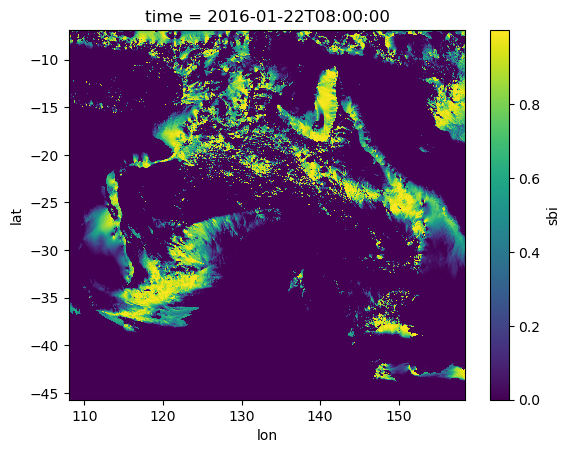

In [175]:
sbi.sbi.sel(time=t).plot()

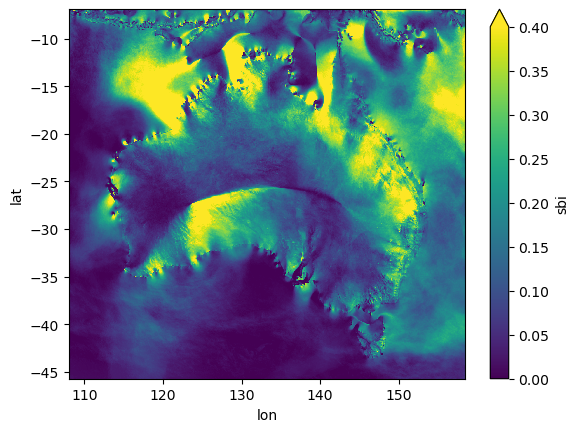

In [176]:
(sbi.sbi > 0.5).mean("time").plot(vmin=0,vmax=0.4)